<a href="https://colab.research.google.com/github/Shegun93/Artficial-Neural-Network/blob/main/Credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

##Install MiniSom Package

In [ ]:
!pip install MiniSom

### Importing the libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Importing the dataset

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler(feature_range=(0,1))
X=SC.fit_transform(X)

##Training the SOM


In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

##Visualizing the results


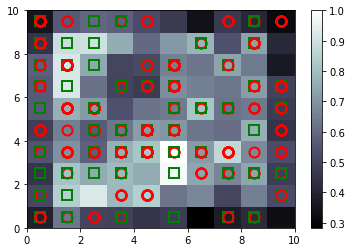

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,2)], mappings[(1,6)],mappings[(1,7)]), axis=0)


In [ ]:
frauds=SC.inverse_transform(frauds)

In [ ]:
print(frauds)

[[1.5748552e+07 0.0000000e+00 3.0670000e+01 1.2000000e+01 2.0000000e+00
  8.0000000e+00 4.0000000e+00 2.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 2.0000000e+00 2.2000000e+02 2.0000000e+01]
 [1.5705343e+07 0.0000000e+00 2.0330000e+01 1.0000000e+01 2.0000000e+00
  8.0000000e+00 8.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  4.0000000e+00 0.0000000e+00 2.0000000e+00 5.0000000e+01 1.4660000e+03]
 [1.5771856e+07 0.0000000e+00 2.4500000e+01 1.2750000e+01 2.0000000e+00
  8.0000000e+00 5.0000000e+00 4.7500000e+00 1.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 7.3000000e+01 4.4500000e+02]
 [1.5773776e+07 0.0000000e+00 3.5420000e+01 1.2000000e+01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.4000000e+01 1.0000000e+00 1.0000000e+00
  8.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 6.5910000e+03]
 [1.5791769e+07 0.0000000e+00 2.6920000e+01 1.3500000e+01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 5.0000000e+00 1.0000000e+00 1.

# Printing the Fraunch Clients

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15748552
15705343
15771856
15773776
15791769
15776494
15789611
15809837
15811690
15815095
15759387
15596797
15571415
15565714
15575438
15565996
15644400
15592914
15581871
15611973
15573077
15638272
15588019
15575146
